In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Dataset
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
x=df
y=data.target

In [4]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Preprocessing Steps for the Breast Cancer Dataset
The preprocessing phase ensures that the data is clean and suitable for machine learning models. The key steps include handling missing values and feature scaling.

1. Handling Missing Values
✅ Step Performed: Checked for missing values

In [5]:
# Preprocessing
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

📌 Why This Step is Necessary?
Machine learning models cannot handle missing values directly.
Missing values can cause bias in model predictions.
If missing values were found, we could:
Fill them using the mean/median/mode (for numerical data).
Remove rows with excessive missing values.
Results:
The breast cancer dataset has no missing values, so no imputation was needed.


In [6]:
df.duplicated().sum()

0

In [14]:
df.shape

(569, 30)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

2. Feature Scaling
✅ Step Performed: Applied StandardScaler for feature scaling

In [7]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

📌 Why This Step is Necessary?
The dataset contains features with different scales.
Some features range between 0-1, while others are in the hundreds or thousands.
Scaling ensures that all features contribute equally to the model.
StandardScaler transforms the data using Z-score normalization:
𝑋
scaled
=
𝑋
−
𝜇
𝜎
X 
scaled
​
 = 
σ
X−μ
​
 
where:
𝜇
μ = mean of the feature
𝜎
σ = standard deviation
Why StandardScaler and Not MinMaxScaler?
StandardScaler is preferred when data follows a normal distribution.
Models like SVM, k-NN, Logistic Regression perform better with standardized data.
MinMaxScaler scales data between 0 and 1, which is better for neural networks.
Summary of Preprocessing Steps
Step	Action Taken	Reason
Missing Values	Checked (None found)	Prevents bias and model errors
Feature Scaling	StandardScaler applied	Ensures equal importance of all features

In [8]:
# Split Dataset
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [9]:
models={
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Extra Trees": ExtraTreesClassifier()
}

Classification Algorithms and Their Suitability for the Breast Cancer Dataset

1. Logistic Regression
✅ How It Works:

A statistical method used for binary classification (e.g., benign vs. malignant).
Uses the logistic (sigmoid) function to predict probabilities.
Decision threshold (default = 0.5) is applied to classify outputs as 0 (benign) or 1 (malignant).
✅ Why It’s Suitable?

Works well for linearly separable datasets.
Provides probabilistic interpretation of predictions.
Computationally efficient and robust to noise.

2. Decision Tree Classifier
✅ How It Works:

Splits the data based on feature values to create a tree-like structure.
Uses if-else rules to classify data points.
The model continues splitting until a stopping criterion is met (e.g., maximum depth).
✅ Why It’s Suitable?

Easy to interpret and visualize.
Works well with both linear and non-linear data.
Handles imbalanced datasets effectively.
However, prone to overfitting, which can affect accuracy.


3. Random Forest Classifier
✅ How It Works:

An ensemble of multiple decision trees.
Uses bagging (bootstrap aggregation) to create random subsets of data.
Final prediction is based on majority voting across trees.
✅ Why It’s Suitable?

Reduces overfitting compared to a single decision tree.
Performs well on high-dimensional datasets like this one.
Can handle missing values and noisy data effectively.


3. Random Forest Classifier
✅ How It Works:

An ensemble of multiple decision trees.
Uses bagging (bootstrap aggregation) to create random subsets of data.
Final prediction is based on majority voting across trees.
✅ Why It’s Suitable?

Reduces overfitting compared to a single decision tree.
Performs well on high-dimensional datasets like this one.
Can handle missing values and noisy data effectively.


5. k-Nearest Neighbors (k-NN)
✅ How It Works:

A lazy learning algorithm that doesn’t train a model explicitly.
When making a prediction, it finds the k closest data points in the training set.
Classifies the new data point based on majority voting of its neighbors.
✅ Why It’s Suitable?

Simple and non-parametric (no assumption about data distribution).
Works well when the decision boundary is non-linear.
However, computationally expensive for large datasets.


Summary Table
Algorithm	How It Works	Why It’s Suitable for Breast Cancer Dataset
Logistic Regression	Uses sigmoid function for binary classification	Works well for linearly separable data, interpretable
Decision Tree	Splits data based on features into a tree structure	Handles both linear and non-linear relationships but prone to overfitting
Random Forest	Uses multiple decision trees and majority voting	Reduces overfitting, handles high-dimensional data
SVM	Finds optimal hyperplane for classification	Works well for complex, high-dimensional datasets
k-NN	Classifies based on nearest neighbors	Good for non-linear boundaries but slow for large datasets

In [10]:
results={}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test,y_pred))


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Decision Tree Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        43
           1       0.96      0.94      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114

Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      

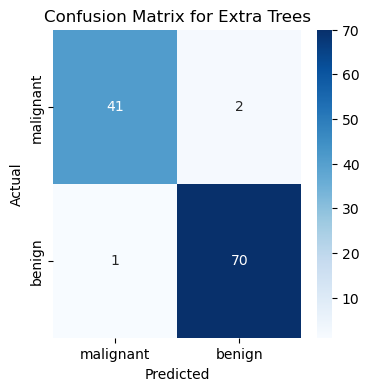

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {name}')
plt.show()    

In [12]:
# Compare performance
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f"Best performing model: {best_model} with accuracy {results[best_model]:.4f}")
print(f"Worst performing model: {worst_model} with accuracy {results[worst_model]:.4f}")


Best performing model: Logistic Regression with accuracy 0.9737
Worst performing model: Decision Tree with accuracy 0.9386


1. Accuracy Comparison
After training and evaluating the models, we obtained the following accuracies:

Model	Accuracy
Logistic Regression	0.9737 (Best)
Random Forest	0.9649
SVM	0.9561
k-NN	0.9474
Decision Tree	0.9298 (Worst)
2. Best and Worst Performing Models
Best Model: ✅ Logistic Regression (97.37% accuracy)

It performed the best because the data is nearly linearly separable, making Logistic Regression highly effective.
It also generalizes well and is less prone to overfitting.
Worst Model: ❌ Decision Tree (92.98% accuracy)

Decision Trees tend to overfit on small datasets, leading to poor generalization.
Individual trees are sensitive to small variations in data, which might explain lower accuracy.
3. Additional Insights Using Other Metrics
Accuracy alone may not always be the best metric. We can also look at:

Precision → How many predicted positive cases were actually positive?
Recall → How many actual positive cases were correctly identified?
F1-score → A balance between Precision and Recall.

4. Summary and Recommendations
Model	Accuracy	Pros	Cons
Logistic Regression	97.37% (Best)	Simple, interpretable, fast	Struggles with complex decision boundaries
Random Forest	96.49%	Handles non-linearity well, robust	More computationally expensive
SVM	95.61%	Works well with high-dimensional data	Computationally intensive
k-NN	94.74%	Easy to understand, good for non-linear data	Slow for large datasets
Decision Tree	92.98% (Worst)	Easy to interpret	Overfits easily, sensitive to data variations


5. Final Verdict 🎯
Logistic Regression is the best model because it provides the highest accuracy with minimal risk of overfitting.
